# Read dataset

In [24]:
import pandas as pd
import numpy as np
from ml_functions import *

df = pd.read_csv('toy_dataset.csv', index_col=0)
df.shape

(4046, 26)

Intial dataset size.

In [25]:
df[['rxn_a','rxn_b','rxn_c']] = df['id'].str.split(',', expand=True)

In [26]:
def count_deletions(x):

    return len(x.split(','))

no_delitions = []
for row in range(len(df)):

    num = count_deletions(df['id'].iloc[row])
    no_delitions.append(num)

df['no_deletions'] = no_delitions
df.head()

,r1,r3,r2,r4,r5,r6,r7,r8,r9,r10,...,OutputN,id,growth,strain,infeasible,optimal,rxn_a,rxn_b,rxn_c,no_deletions
0,0.0,0.1,-0.1,-0.2,1.2,1.0,1.0,1.0,1.0,-6.938894e-17,...,1.0,r1,3.0,1,1,0,r1,None,None,1
1,1.0,0.0,1.0,2.0,1.0,3.0,3.0,3.0,1.0,0.000000e+00,...,1.0,r3,9.0,1,0,1,r3,None,None,1
2,1.0,1.0,0.0,0.0,3.0,3.0,3.0,3.0,1.0,0.000000e+00,...,1.0,r2,9.0,1,0,1,r2,None,None,1
3,1.0,1.0,0.0,0.0,3.0,3.0,3.0,3.0,1.0,0.000000e+00,...,1.0,r4,9.0,1,0,1,r4,None,None,1
4,1.0,0.1,0.9,1.8,1.2,3.0,3.0,3.0,1.0,0.000000e+00,...,1.0,r5,9.0,1,1,0,r5,None,None,1


### Store reactions names

In [27]:
# Store all reactions names
gem_rxn = df[df['no_deletions'] == 1]['id'].unique()

# Some statistical study

In [28]:
print('Infeasible', round(df['optimal'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Optimal', round(df['optimal'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

Infeasible 69.25 % of the dataset
Optimal 30.75 % of the dataset


In [29]:
# Subset of df containing only infeasible rows
df_inf = df[df['optimal'] == 0]

Οι αντιδράσεις που φαίνονται στο επόμενο κελί __ΔΕΝ__ οδήγησαν __ποτέ__ σε _infeasible_ status όταν κόπηκαν.

Μια λογική είναι να κοπούν οι παρακάτω αντιδράσεις. Εξαίρεση, οι αντιδράσεις που αφορούν input/output.

In [30]:
set(df_inf[df_inf['no_deletions']==1]['id'].unique()) ^ set(gem_rxn)

{'InputA', 'InputI', 'OutputN', 'r10', 'r14', 'r15', 'r2', 'r3', 'r4'}

Οι παρακάτω αντιδράσεις εάν κοπούν οδηγούν σε **infeasible** κατάσταση. Επομένως, ΔΕ θα πρέπει να περιλαμβάνονται στα deletions. Οι αντιδράσεις αυτές, δηλαδή, θα πρέπει να **προστατευτούν** από τα reaction deletions.

In [31]:
critical_rxn = df_inf[df_inf['no_deletions']==1]['id'].unique()
critical_rxn

array(['r1', 'r5', 'r6', 'r7', 'r8', 'r9', 'r11', 'r12', 'r13', 'outputK',
       'r16', 'OutputX'], dtype=object)

In [32]:
index_del_rxn_a = df.loc[df['rxn_a'].isin(critical_rxn)].index
df.drop(index_del_rxn_a, inplace=True)

index_del_rxn_b = df.loc[df['rxn_b'].isin(critical_rxn)].index
df.drop(index_del_rxn_b, inplace=True)

index_del_rxn_c = df.loc[df['rxn_c'].isin(critical_rxn)].index
df.drop(index_del_rxn_c, inplace=True)

In [33]:
df.shape

(438, 30)

### Find and Delete Duplicated Rows 

In [34]:
index_a = df[df['rxn_a'] == df['rxn_b']].index
df.drop(index_a, axis=0, inplace=True)

index_b = df[df['rxn_a'] == df['rxn_c']].index
df.drop(index_b, axis=0, inplace=True)

index_c = df[df['rxn_b'] == df['rxn_c']].index
df.drop(index_c, axis=0, inplace=True)

df.shape

(258, 30)

# Further Study dataset

In [35]:
print('Infeasible', round(df['optimal'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Optimal', round(df['optimal'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

Infeasible 31.01 % of the dataset
Optimal 68.99 % of the dataset


In [36]:
df['optimal'].value_counts()

1    178
0     80
Name: optimal, dtype: int64

In [37]:
pd.DataFrame(df[['growth', 'OutputX']].describe()).T

,count,mean,std,min,25%,50%,75%,max
growth,258.0,4.944574,3.373216,-3.0,3.0,6.0,6.0,10.0
OutputX,258.0,4.944574,3.373216,-3.0,3.0,6.0,6.0,10.0


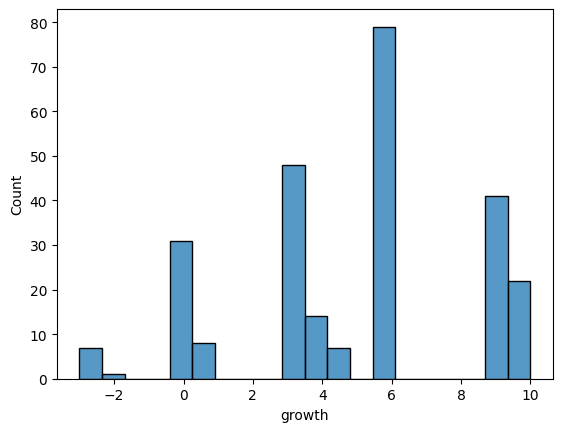

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data=df, x="growth", bins=20)
plt.show()

## Negative growth

In [39]:
df[df['growth'] < 0]

,r1,r3,r2,r4,r5,r6,r7,r8,r9,r10,...,OutputN,id,growth,strain,infeasible,optimal,rxn_a,rxn_b,rxn_c,no_deletions
243,0.000000e+00,0.1,-1.100000,-2.200000,1.200000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,1.480297e-16,1.000000e+00,...,1.0,"InputA,InputI",-3.000000e+00,1,1,0,InputA,InputI,None,2
684,0.000000e+00,0.0,-1.000000,-2.000000,1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.480297e-16,1.000000e+00,...,1.0,"r3,InputA,InputI",-3.000000e+00,1,1,0,r3,InputA,InputI,3
874,0.000000e+00,-1.0,0.000000,0.000000,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,1.480297e-16,1.000000e+00,...,1.0,"r2,InputA,InputI",-3.000000e+00,1,1,0,r2,InputA,InputI,3
1045,0.000000e+00,-1.0,0.000000,0.000000,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,1.480297e-16,1.000000e+00,...,1.0,"r4,InputA,InputI",-3.000000e+00,1,1,0,r4,InputA,InputI,3
1728,0.000000e+00,0.1,-1.100000,-2.200000,1.200000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,1.480297e-16,1.000000e+00,...,1.0,"r10,InputA,InputI",-3.000000e+00,1,1,0,r10,InputA,InputI,3
1958,2.960595e-16,0.1,-1.100000,-2.200000,1.200000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.480297e-16,1.000000e+00,...,1.0,"r14,InputA,InputI",-3.000000e+00,1,1,0,r14,InputA,InputI,3
1979,2.960595e-16,0.1,-1.100000,-2.200000,1.200000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.480297e-16,1.000000e+00,...,1.0,"r15,InputA,InputI",-3.000000e+00,1,1,0,r15,InputA,InputI,3
2009,7.401487e-17,0.1,-0.433333,-0.866667,2.000000e-01,-6.666667e-01,-6.666667e-01,-1.000000e+00,-1.110223e-16,3.333333e-01,...,0.0,"InputA,InputI,OutputN",-2.000000e+00,1,1,0,InputA,InputI,OutputN,3
2544,1.000000e+00,0.0,0.000000,0.000000,-4.255855e-16,-2.035409e-15,-1.924387e-15,-1.000000e+00,0.000000e+00,1.000000e+00,...,0.0,"r3,r2,OutputN",-1.332268e-15,2,0,1,r3,r2,OutputN,3
2562,1.000000e+00,0.0,0.000000,0.000000,-7.956598e-16,-2.072416e-15,-1.942890e-15,-1.000000e+00,0.000000e+00,1.000000e+00,...,0.0,"r3,r4,OutputN",-2.997602e-15,2,0,1,r3,r4,OutputN,3


11 rows of __negative__ growth

### Check Linear Correlations

##### Point Biserial Correlation

In [40]:
pearsons = df.drop(columns=critical_rxn).corr(numeric_only=True)['optimal'].sort_values(ascending=False)
spearman = df.drop(columns=critical_rxn).corr(numeric_only=True, method='spearman')['optimal'].sort_values(ascending=False)

corr_matrix = pd.DataFrame({'pearsons':pearsons, 'spearman':spearman})
corr_matrix.sort_values(by='pearsons')

,pearsons,spearman
infeasible,-1.000000,-1.000000
no_deletions,-0.250378,-0.241754
InputI,-0.218214,-0.218214
r14,-0.207541,-0.296564
r15,-0.207541,-0.160858
OutputN,-0.127978,-0.107804
r2,-0.074485,-0.134973
r4,-0.074485,-0.100510
r10,0.007492,0.128375
growth,0.085540,0.063677


# AI / ML Ideas

## Create _training_ and _test_ sets and _data normalization_

df keeping only NON critical rxn.

In [41]:
df.drop(columns=critical_rxn, inplace=True)
df.head()

,r3,r2,r4,r10,r14,r15,InputA,InputI,OutputN,id,growth,strain,infeasible,optimal,rxn_a,rxn_b,rxn_c,no_deletions
1,0.0,1.0,2.0,0.0,0.0,0.0,1.0,1.0,1.0,r3,9.0,1,0,1,r3,None,None,1
2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,r2,9.0,1,0,1,r2,None,None,1
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,r4,9.0,1,0,1,r4,None,None,1
9,0.1,0.9,1.8,0.0,0.0,0.0,1.0,1.0,1.0,r10,9.0,1,0,1,r10,None,None,1
14,0.1,0.9,1.8,0.0,0.0,0.0,1.0,1.0,1.0,r14,9.0,1,0,1,r14,None,None,1


In [44]:
df.drop(columns='id', inplace=True)

In [45]:
# Create dummy variables for rxn_a, rxn_b, rxn_c

dummy_rxna = pd.get_dummies(df['rxn_a'], prefix='rxna_')
dummy_rxnb = pd.get_dummies(df['rxn_b'], prefix='rxnb_')
dummy_rxnc = pd.get_dummies(df['rxn_c'], prefix='rxnc_')

dummies = pd.concat([dummy_rxna, dummy_rxnb, dummy_rxnc], axis=1)
dummies.head(2)

,rxna__InputA,rxna__InputI,rxna__OutputN,rxna__r10,rxna__r14,rxna__r15,rxna__r2,rxna__r3,rxna__r4,rxnb__InputA,...,rxnb__r15,rxnb__r2,rxnb__r4,rxnc__InputA,rxnc__InputI,rxnc__OutputN,rxnc__r10,rxnc__r14,rxnc__r15,rxnc__r4
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
df = pd.concat([df, dummies], axis=1)
df.head(2)

,r3,r2,r4,r10,r14,r15,InputA,InputI,OutputN,growth,...,rxnb__r15,rxnb__r2,rxnb__r4,rxnc__InputA,rxnc__InputI,rxnc__OutputN,rxnc__r10,rxnc__r14,rxnc__r15,rxnc__r4
1,0.0,1.0,2.0,0.0,0.0,0.0,1.0,1.0,1.0,9.0,...,0,0,0,0,0,0,0,0,0,0
2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,9.0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### Define **target** variable

We need to better define the target that we want to predict!

(The most simple and obvious answer is to predit **optimal** column)

In [59]:
X = df.drop(['optimal', 'infeasible', 'growth', 'rxn_a', 'rxn_b', 'rxn_c'], axis=1)
y = df['infeasible']

print(X.shape)
print(y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, stratify=y, random_state=42)

(258, 35)
(258,)


In [60]:
# normalize data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [61]:
print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))
print(df['optimal'].value_counts(normalize=True))

0    0.688889
1    0.311111
Name: infeasible, dtype: float64
0    0.692308
1    0.307692
Name: infeasible, dtype: float64
1    0.689922
0    0.310078
Name: optimal, dtype: float64


### SVM Classifier

In [62]:
svc_model, svc_scores = train_svm(X_train_scaled, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV 1/3; 1/20] START C=0.1, gamma=2, kernel=rbf.................................
[CV 1/3; 1/20] END ..C=0.1, gamma=2, kernel=rbf;, score=0.882 total time=   0.0s
[CV 3/3; 3/20] START C=0.5, gamma=10, kernel=linear.............................
[CV 3/3; 3/20] END C=0.5, gamma=10, kernel=linear;, score=0.823 total time=   0.0s
[CV 1/3; 4/20] START C=0.05, gamma=2, kernel=linear.............................
[CV 1/3; 4/20] END C=0.05, gamma=2, kernel=linear;, score=0.775 total time=   0.0s
[CV 2/3; 4/20] START C=0.05, gamma=2, kernel=linear.............................
[CV 2/3; 4/20] END C=0.05, gamma=2, kernel=linear;, score=0.915 total time=   0.0s
[CV 3/3; 4/20] START C=0.05, gamma=2, kernel=linear.............................
[CV 3/3; 4/20] END C=0.05, gamma=2, kernel=linear;, score=0.805 total time=   0.0s
[CV 1/3; 5/20] START C=0.05, gamma=0.1, kernel=rbf..............................
[CV 2/3; 3/20] START C=0.5, gamma=10, ke

In [63]:
validation_classification(svc_model, X_test_scaled, y_test)

ROC-AUC = 0.849537037037037


### XGBoost Classifier

In [64]:
xgb_model, xgb_scores = xgb_classifier(X_train_scaled, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV 1/3; 1/20] START colsample_bytree=0.7, gamma=0.1, learning_rate=0.3, max_depth=5, min_child_weight=1
[CV 3/3; 1/20] START colsample_bytree=0.7, gamma=0.1, learning_rate=0.3, max_depth=5, min_child_weight=1
[CV 2/3; 2/20] START colsample_bytree=0.5, gamma=0.3, learning_rate=0.15, max_depth=6, min_child_weight=7[CV 3/3; 2/20] START colsample_bytree=0.5, gamma=0.3, learning_rate=0.15, max_depth=6, min_child_weight=7

[CV 1/3; 2/20] START colsample_bytree=0.5, gamma=0.3, learning_rate=0.15, max_depth=6, min_child_weight=7
[CV 1/3; 3/20] START colsample_bytree=0.5, gamma=0.3, learning_rate=0.1, max_depth=6, min_child_weight=3
[CV 2/3; 3/20] START colsample_bytree=0.5, gamma=0.3, learning_rate=0.1, max_depth=6, min_child_weight=3
[CV 2/3; 1/20] START colsample_bytree=0.7, gamma=0.1, learning_rate=0.3, max_depth=5, min_child_weight=1
[CV 2/3; 2/20] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.15, max_depth=6, min_child_w

In [65]:
validation_classification(xgb_model, X_test_scaled, y_test)

ROC-AUC = 0.8819444444444444


#### Usage of UnderSampling and Oversampling

In [66]:
import imblearn
from imblearn.under_sampling import TomekLinks
from collections import Counter

In [67]:
# define the undersampling method
undersample = TomekLinks()
X_train_under, y_train_under = undersample.fit_resample(X_train_scaled, y_train)

In [68]:
print( Counter(y_train) )

print( Counter (y_train_under) )

Counter({0: 124, 1: 56})
Counter({0: 114, 1: 56})


# Feature Importance to detect reactions for knock-out

In [69]:
import shap

explainer = shap.TreeExplainer(xgb_model, X_train_scaled, feature_names=X_train.columns)
shap_values = explainer(X_test_scaled)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


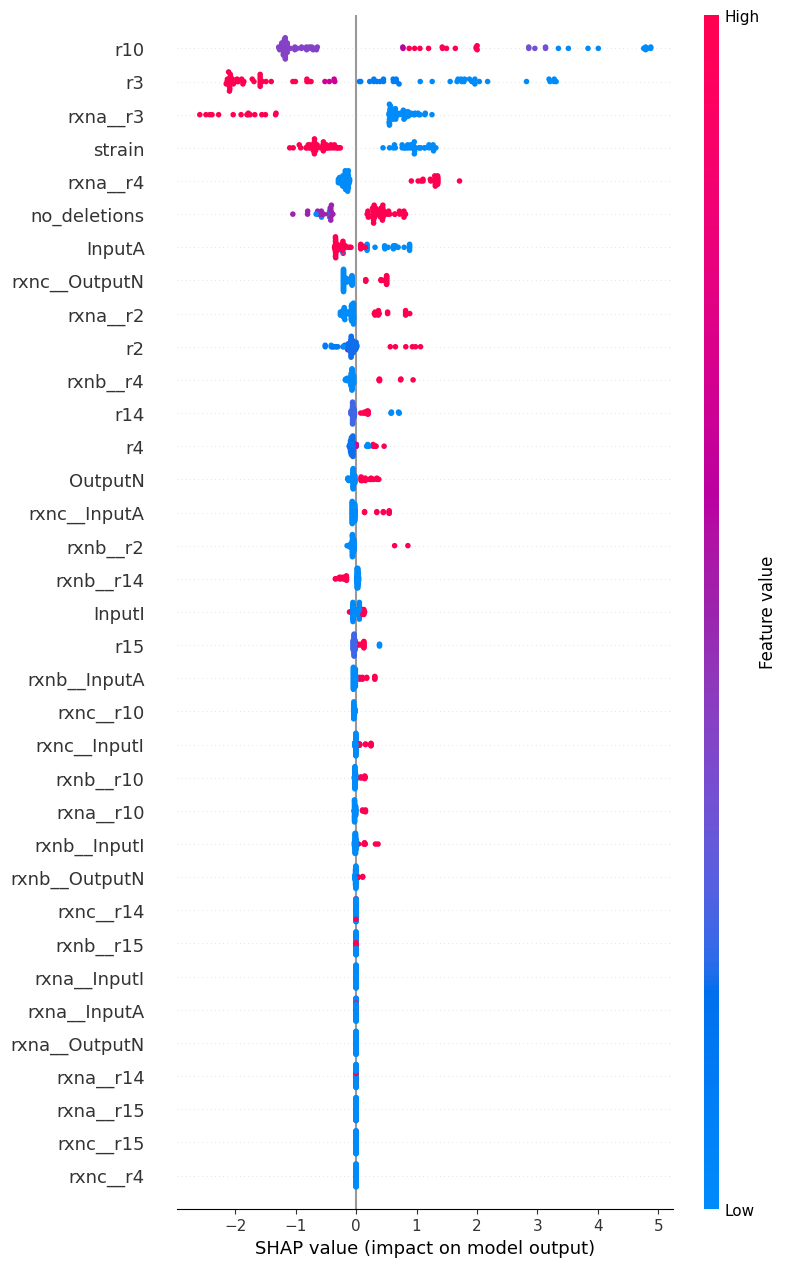

In [70]:
shap.plots.beeswarm(shap_values, max_display=X_train.shape[1])

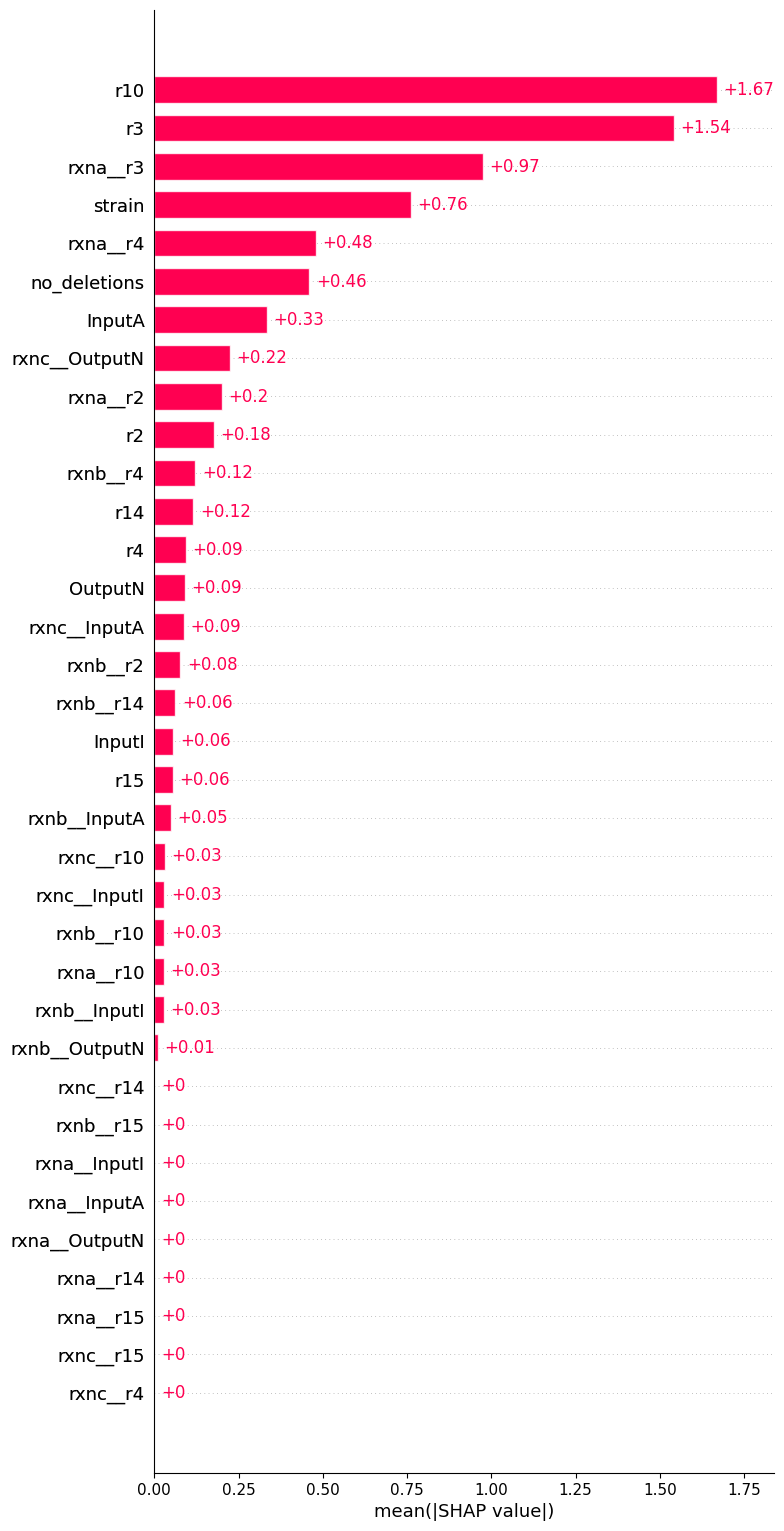

In [71]:
shap.plots.bar(shap_values, max_display=X_test.shape[1])

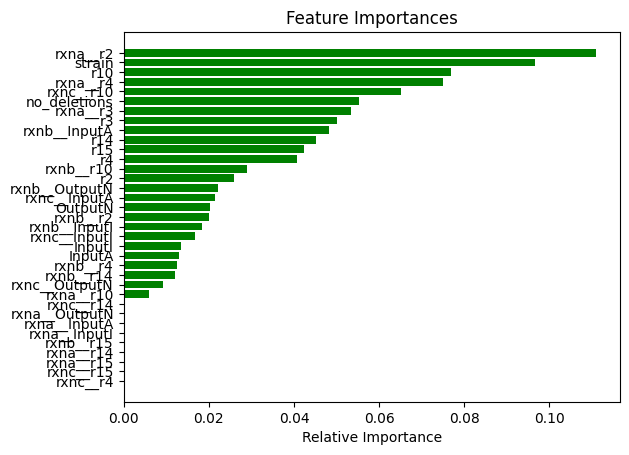

In [72]:
importances = xgb_model.feature_importances_
indices = np.argsort(importances)
features = X_train.columns
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# Artificial Neural Networks

In [73]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

2022-11-13 17:44:32.243824: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-13 17:44:32.406625: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-11-13 17:44:32.406643: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-11-13 17:44:32.436009: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-11-13 17:44:33.246963: W tensorflow/stream_executor/platform/de

In [74]:
n_inputs = len(X_train.columns)

In [75]:
model = Sequential()
model.add(Dense(120, input_dim=n_inputs, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics = [
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ])

history = model.fit(X_train_scaled, y_train, epochs=10, batch_size=5)

Epoch 1/10


2022-11-13 17:44:36.167828: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-11-13 17:44:36.167854: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2022-11-13 17:44:36.167873: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (comex-dell): /proc/driver/nvidia/version does not exist
2022-11-13 17:44:36.168127: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


36/36 [==============================] - 1s 2ms/step - loss: 0.7663 - accuracy: 0.5556 - precision: 0.3800 - recall: 0.6786
Epoch 2/10
36/36 [==============================] - 0s 2ms/step - loss: 0.5223 - accuracy: 0.7444 - precision: 0.6190 - recall: 0.4643   
Epoch 3/10
36/36 [==============================] - 0s 2ms/step - loss: 0.4372 - accuracy: 0.7944 - precision: 0.7568 - recall: 0.5000   
Epoch 4/10
36/36 [==============================] - 0s 2ms/step - loss: 0.3778 - accuracy: 0.8667 - precision: 0.8333 - recall: 0.7143
Epoch 5/10
36/36 [==============================] - 0s 2ms/step - loss: 0.3333 - accuracy: 0.8889 - precision: 0.8462 - recall: 0.7857
Epoch 6/10
36/36 [==============================] - 0s 2ms/step - loss: 0.2912 - accuracy: 0.8944 - precision: 0.8627 - recall: 0.7857
Epoch 7/10
36/36 [==============================] - 0s 2ms/step - loss: 0.2634 - accuracy: 0.9111 - precision: 0.9000 - recall: 0.8036
Epoch 8/10
36/36 [==============================] - 0s 2ms/s

In [76]:
validation_classification(model, X_test_scaled, y_test)

3/3 [==============================] - 0s 3ms/step
ROC-AUC = 0.8665123456790124


In [77]:
import shap


explainer = shap.DeepExplainer(model, X_train_scaled)

keras is no longer supported, please use tf.keras instead.
Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.


In [78]:
shap_values = explainer.shap_values(X_test_scaled)

`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


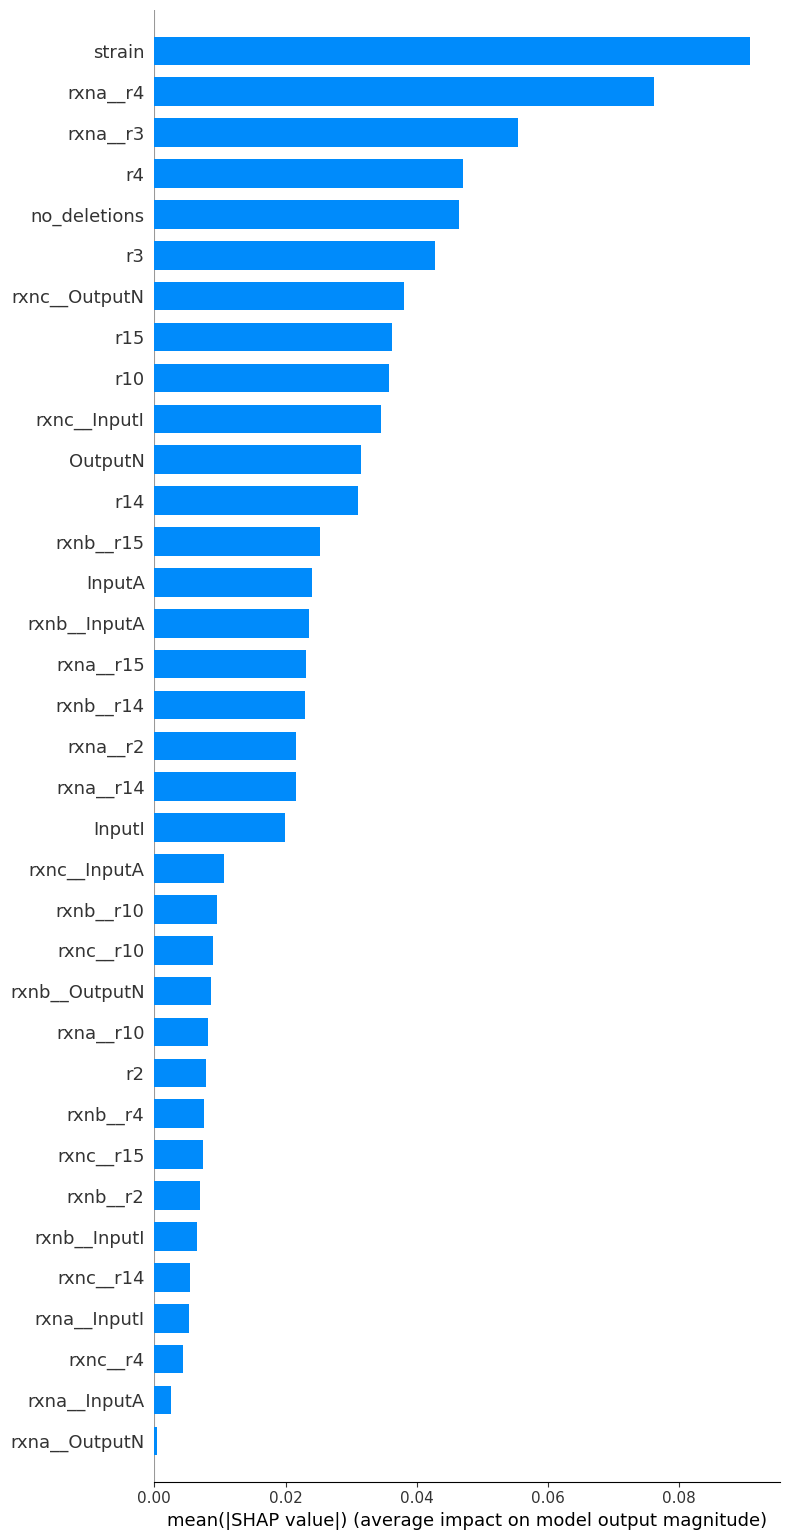

In [85]:
shap.summary_plot(shap_values[0], plot_type = 'bar', feature_names = X_test.columns, max_display=X_test.shape[1])